In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, 
                                         SimpleExpSmoothing,Holt)
import seaborn as sns

F:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
F:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
data = pd.read_excel('E:/postgraduate/案例选题数据及说明/石油天然气.xlsx')

In [3]:
data['时间'] = data['时间'].str.split(',').str[0]
data.index = data['时间']
data = data[['开盘','最高','最低','收盘','总手']]
data.head()

,开盘,最高,最低,收盘,总手
时间,,,,,
2021-01-04,423.00,440.25,413.75,413.75,51788
2021-01-05,418.25,439.00,417.50,436.25,122772
2021-01-06,435.25,442.75,429.00,436.00,126959
2021-01-07,435.75,441.75,435.75,438.50,106514
2021-01-08,439.25,453.25,437.75,452.00,106181


In [4]:
data1 = data.loc['2021-01-12':'2022-02-23']#取2022-2-24之前的数据
data1.tail()

,开盘,最高,最低,收盘,总手
时间,,,,,
2022-02-17,806.25,825.50,802.25,815.75,98729
2022-02-18,812.75,820.50,790.25,813.50,76748
2022-02-21,821.00,840.50,806.00,839.50,44395
2022-02-22,835.50,857.75,824.00,830.25,66096
2022-02-23,829.50,843.50,821.75,837.50,58138


Text(0, 0.5, '收盘价')

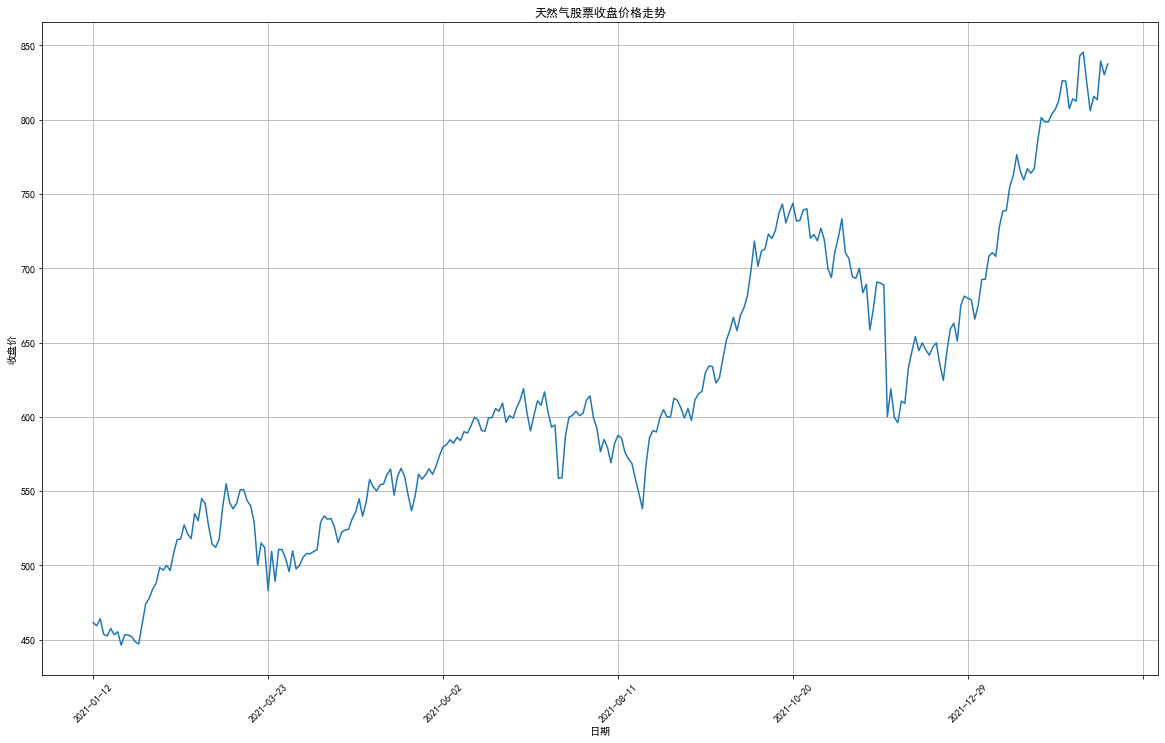

In [5]:
#绘制时序图
ts = data1['收盘']
plt.rcParams['font.sans-serif'] = ['simhei']  #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号 
ts.plot(figsize=(20,12))         
plt.title("天然气股票收盘价格走势")  #添加图标题 
plt.xticks(rotation=45)  #横坐标旋转45度
plt.grid()
plt.xlabel('日期')   #添加图的标签（x轴，y轴）
plt.ylabel('收盘价')

<ipython-input-7-728eb4f5f9c9>:10: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead.
  decomposition = seasonal_decompose(ts,model='multiplicative', freq=30)


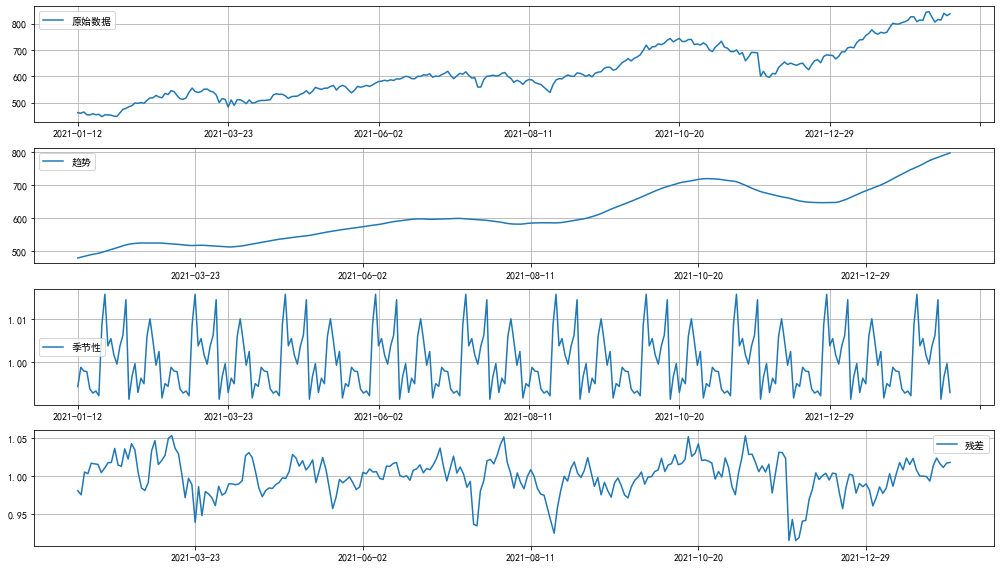

In [7]:
import matplotlib.ticker as ticker
rcParams['figure.figsize'] = 14, 8
#result = seasonal_decompose(ts, model='multiplicative', freq=30)
#plt.figure(figsize=(16,8))
#fig = result.plot()
#plt.grid()
#plt.show()


decomposition = seasonal_decompose(ts,model='multiplicative', freq=30)
trend = decomposition.trend #趋势效应
seasonal = decomposition.seasonal #季节效应
residual = decomposition.resid #随机效应
ax = plt.subplot(411)
ax.grid()
ax.plot(ts, label=u'原始数据')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=50))
plt.legend(loc='best')
ax = plt.subplot(412)
ax.grid()
ax.plot(trend, label=u'趋势')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=50))
plt.legend(loc='best')
ax = plt.subplot(413)
ax.grid()
ax.plot(seasonal,label=u'季节性')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=50))
plt.legend(loc='best')
ax = plt.subplot(414)
ax.grid()
ax.plot(residual, label=u'残差')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=50))
plt.legend(loc='best')
plt.tight_layout()

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rollmean = timeseries.rolling(8).mean()
    rollstd  = timeseries.rolling(8).std()
    
    # plot rolling stats
    ax = plt.subplot(111)
    orig = plt.plot(timeseries, color = 'red', label = '原始序列')
    mean = plt.plot(rollmean, color='green', label = '移动平均')
    std  = plt.plot(rollstd, color = 'blue', label = '移动标准差')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=50))
    plt.legend(loc = 'best')
    plt.title('移动平均和标准差')
    plt.grid()
    plt.show(block = False)
    
    # DF test for stationarity
    print('Dickey-Fuller test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['t-stat','p-val', '#lags used','no. of obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

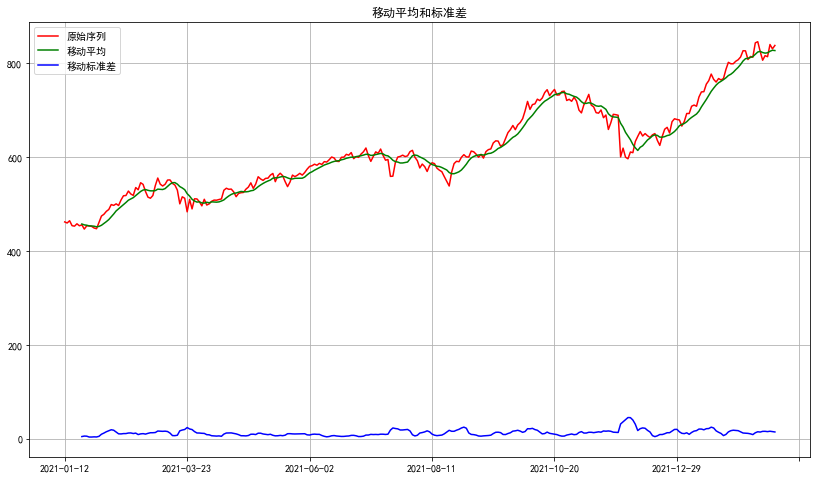

Dickey-Fuller test:
t-stat                   -0.374943
p-val                     0.914199
#lags used                0.000000
no. of obs              290.000000
Critical Value (1%)      -3.453102
Critical Value (5%)      -2.871559
Critical Value (10%)     -2.572108
dtype: float64


In [9]:
test_stationarity(ts)

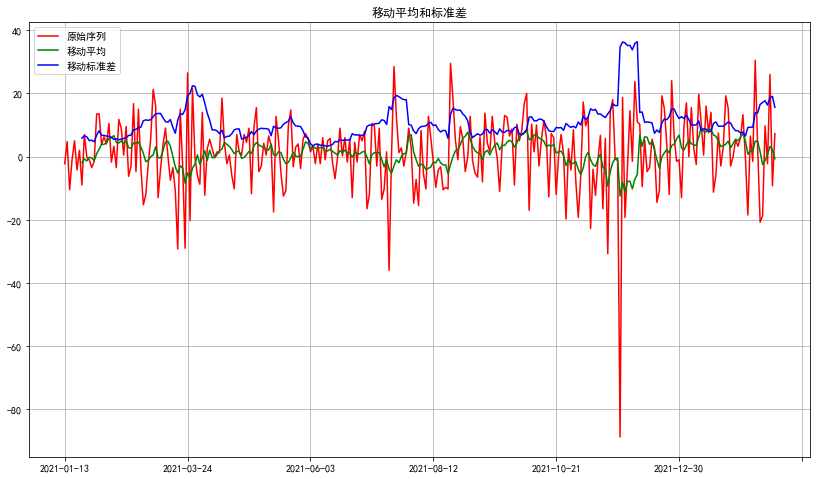

Dickey-Fuller test:
t-stat                 -7.724277e+00
p-val                   1.170269e-11
#lags used              4.000000e+00
no. of obs              2.850000e+02
Critical Value (1%)    -3.453505e+00
Critical Value (5%)    -2.871735e+00
Critical Value (10%)   -2.572202e+00
dtype: float64


In [10]:
ts_first_difference = ts - ts.shift(1)
test_stationarity(ts_first_difference.dropna(inplace=False))

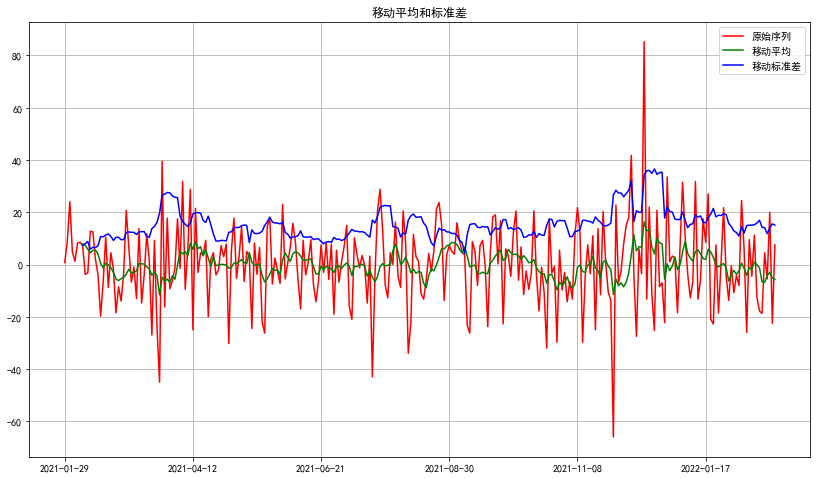

Dickey-Fuller test:
t-stat                 -6.362871e+00
p-val                   2.449935e-08
#lags used              1.100000e+01
no. of obs              2.660000e+02
Critical Value (1%)    -3.455175e+00
Critical Value (5%)    -2.872468e+00
Critical Value (10%)   -2.572593e+00
dtype: float64


In [11]:
ts_first_difference = ts - ts.shift(1) #一阶差分
ts_seasonal_first_difference = ts_first_difference - ts_first_difference.shift(12) #12步差分  
test_stationarity(ts_seasonal_first_difference.dropna(inplace=False))

In [13]:
import statsmodels.api as sm
ts_seasonal_first_difference.dropna(inplace = True)
r,q,p = sm.tsa.acf(ts_seasonal_first_difference.values.squeeze(), qstat=True) 
data = np.c_[range(1,41), r[1:], q, p] 
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"]) 
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0  -0.099515    2.782913  9.527475e-02
2.0  -0.053010    3.575420  1.673430e-01
3.0  -0.085829    5.660588  1.293430e-01
4.0  -0.092018    8.066024  8.918938e-02
5.0   0.109533   11.486858  4.253728e-02
6.0   0.073884   13.049038  4.226379e-02
7.0  -0.031062   13.326168  6.454905e-02
8.0   0.014301   13.385128  9.926772e-02
9.0   0.077675   15.131000  8.739991e-02
10.0 -0.044450   15.704866  1.083984e-01
11.0  0.063418   16.877381  1.115553e-01
12.0 -0.395764   62.712052  7.198570e-09
13.0  0.007836   62.730087  1.698375e-08
14.0  0.104611   65.956762  1.031915e-08
15.0  0.034497   66.308978  2.012413e-08
16.0  0.058513   67.326191  2.919357e-08
17.0  0.026234   67.531443  5.713405e-08
18.0 -0.122005   71.987862  2.077080e-08
19.0 -0.053338   72.842896  3.078782e-08
20.0  0.116721   76.953303  1.283521e-08
21.0 -0.020411   77.079481  2.469651e-08
22.0  0.120748   81.512701  9.119436e-09
23.0  0.111523  

F:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
F:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [40]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
from statsmodels.tsa.arima_model import ARIMA 
 
pmax = int(5)    #一般阶数不超过 length /10
qmax = int(5)
aic_matrix = []
for p in range(pmax +1):
    temp= []
    for q in range(qmax+1):
        try:
            temp.append(ARIMA(ts, (p, 1, q)).fit().aic)
        except:
            temp.append(None)
        aic_matrix.append(temp)

aic_matrix = pd.DataFrame(aic_matrix)   #将其转换成Dataframe 数据结构
p,q = aic_matrix.stack().astype('float64').idxmin()   #先使用stack 展平， 然后使用 idxmin 找出最小值的位置
print(u'AIC 最小的p值 和 q 值：%s,%s' %(p,q))  #  BIC 最小的p值 和 q 值：0,1

AIC 最小的p值 和 q 值：0,5


In [17]:
import itertools
def get_ARIMA_params(data, pdq, m=12):
    p = d = q = range(0, 3)
    seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]
    score_aic = 1000000.0
    warnings.filterwarnings("ignore") # specify to ignore warning messages
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(data,
                                        order=pdq,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        print('x{}12 - AIC:{}'.format(param_seasonal, results.aic))
        if results.aic < score_aic:
            score_aic = results.aic
            params = param_seasonal, results.aic
    param_seasonal, results.aic = params
    print('x{}12 - AIC:{}'.format(param_seasonal, results.aic))

In [35]:
pdq = [0, 1, 5]
get_ARIMA_params(ts, pdq)

x(0, 0, 0, 12)12 - AIC:2223.403830294734
x(0, 0, 1, 12)12 - AIC:2134.598095136316
x(0, 0, 2, 12)12 - AIC:2050.7111104291266
x(0, 1, 0, 12)12 - AIC:2277.0505679617127
x(0, 1, 1, 12)12 - AIC:2063.6387247800735
x(0, 1, 2, 12)12 - AIC:1976.6266480024658
x(0, 2, 0, 12)12 - AIC:2450.9365517778324
x(0, 2, 1, 12)12 - AIC:2134.023857941018
x(0, 2, 2, 12)12 - AIC:1927.571791193162
x(1, 0, 0, 12)12 - AIC:2179.014470030094
x(1, 0, 1, 12)12 - AIC:2136.3858535884538
x(1, 0, 2, 12)12 - AIC:2051.3640297330703
x(1, 1, 0, 12)12 - AIC:2182.4564405559086
x(1, 1, 1, 12)12 - AIC:2065.6072782377114
x(1, 1, 2, 12)12 - AIC:1973.5250978663087
x(1, 2, 0, 12)12 - AIC:2278.912181402816
x(1, 2, 1, 12)12 - AIC:2085.231533785967
x(1, 2, 2, 12)12 - AIC:1929.5601099032792
x(2, 0, 0, 12)12 - AIC:2093.0237272555087
x(2, 0, 1, 12)12 - AIC:2095.0209422845446
x(2, 0, 2, 12)12 - AIC:2053.3954865529936
x(2, 1, 0, 12)12 - AIC:2065.186501690683
x(2, 1, 1, 12)12 - AIC:2022.9630876705944
x(2, 1, 2, 12)12 - AIC:1975.5227524634317


In [36]:
mod = sm.tsa.statespace.SARIMAX(ts, trend='n', order=(0,1,5), seasonal_order=(0,2,2,12))
results = mod.fit()
print(results.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                      收盘   No. Observations:                  291
Model:             SARIMAX(0, 1, 5)x(0, 2, [1, 2], 12)   Log Likelihood               -1087.938
Date:                                 Sat, 12 Mar 2022   AIC                           2191.877
Time:                                         21:17:29   BIC                           2220.545
Sample:                                              0   HQIC                          2203.394
                                                 - 291                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0729      0.066     -1.098      0.272      -0.203       0

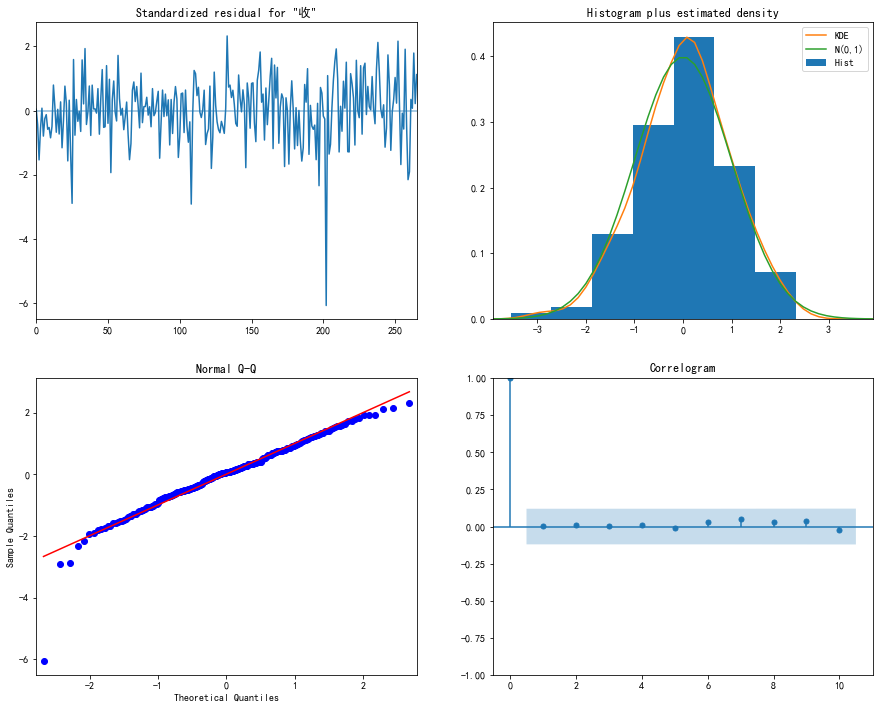

In [37]:
# 模型诊断
results.plot_diagnostics(figsize=(15, 12))
plt.show()

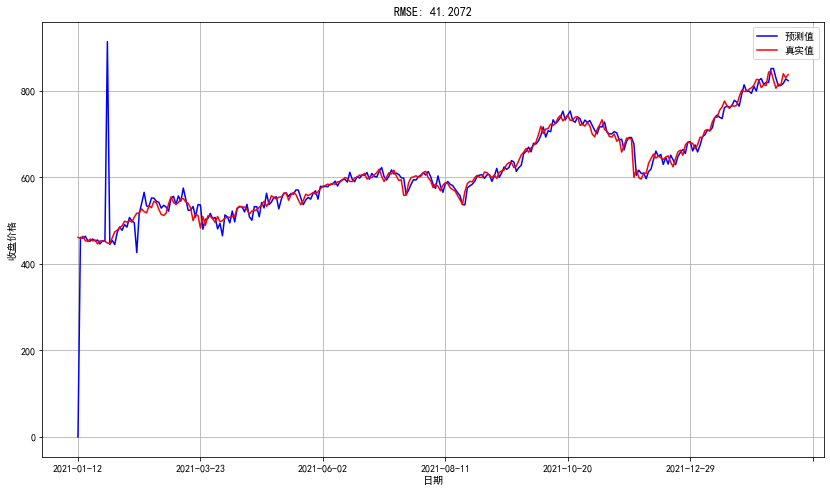

In [38]:
#静态预测
predict_ts = results.predict()
predict_ts.plot(color='blue', label='预测值')
ts.plot(color='red', label='真实值')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((predict_ts-ts)**2)/ts.size))
#RMSE = np.sqrt(sum((predict_ts-ts)**2)/ts.size
plt.xlabel('日期')
plt.ylabel('收盘价格')
plt.grid()
plt.show()

In [39]:
pre = results.forecast(12)
print(pre)

291    837.085146
292    840.375899
293    848.070030
294    851.195998
295    861.249291
296    868.758172
297    869.370340
298    874.893168
299    863.431239
300    868.747670
301    862.095002
302    863.764783
Name: predicted_mean, dtype: float64


<Figure size 2160x720 with 0 Axes>

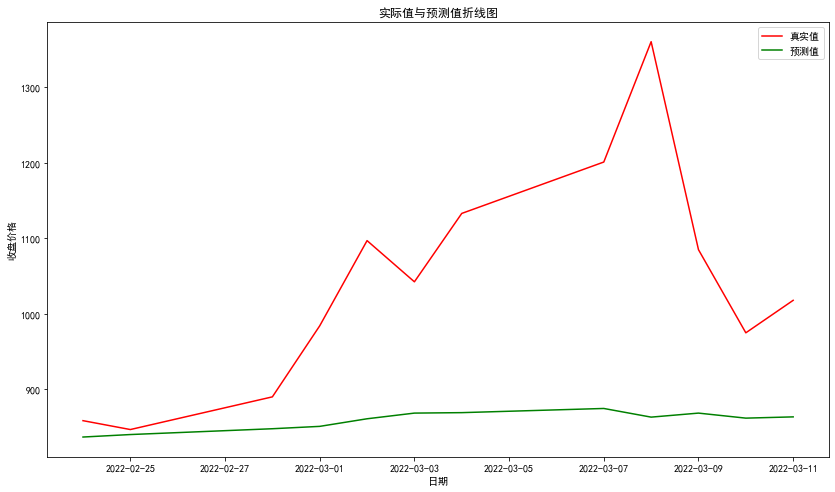

In [41]:
data3 = pd.read_excel('E:/postgraduate/案例选题数据及说明/石油天然气.xlsx')
#data3['时间'] = data3['时间'].str.split(',').str[0]

data3 = data3[['日期','真实值','预测值']]
plt.figure(figsize=(30,10))

x = data3['日期']
y1 = data3['真实值']
y2 = data3['预测值']
fig, ax = plt.subplots(1,1)
ax.plot(x,y1,color = 'r',label = '真实值')

#ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))

plt.plot(x,y2,color = 'g',label = '预测值')
plt.xlabel('日期')
plt.ylabel('收盘价格')
plt.title('实际值与预测值折线图')

plt.legend()
plt.show()